In [10]:
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import graphviz as gv

In [11]:
bn = gum.BayesNet('Tuberlusis')
lstVariables = ["Gender", "latent", "TB", "TBPT", "Diagnosed"]
gender, latent, TB, TBPT, result= [bn.add(name,2) for name in lstVariables] #faster way to add variables
age = bn.add(gum.LabelizedVariable("age", "age", ["age_0_To_14", "age_15_To_44", "age_45_To_64", "age_65_Plus"]))
symptoms = bn.add(gum.LabelizedVariable("Symptom", "Patient's symptom", ["None", "Cough", "Chest_Pain", "Fever", "Sweating_at_night"]))

for link in [(age, latent), (latent, result), (gender,latent), (TBPT,latent), (latent,TB), (TB,symptoms), (TB,result)]:
    bn.addArc(*link)
bn

(pyAgrum.BayesNet<double>@000001DA392AF9D0) BN{nodes: 7, arcs: 7, domainSize: 640, dim: 35, mem: 496o}

In [12]:
# Define CPT for Gender
bn.cpt(gender)[:] = [0.5, 0.5] # 0=female, 1=male

# Define CPT for TBPT
bn.cpt(TBPT)[:] = [0.43, 0.57] #0=not vaccinated, 1=vaccincated

# Define prior probabilities for Age age_probs = [0.09, 0.43, 0.23, 0.25] 
bn.cpt(age)[:] = [0.28, 0.49, 0.17, 0.06]
# Define CPT for latent given Age, Gender, and TBPT

bn.cpt("latent")[{'age': 0, 'Gender': 0, 'TBPT': 0}] = [0.20, 0.80]
bn.cpt("latent")[{'age': 0, 'Gender': 0, 'TBPT': 1}] = [0.55, 0.45]
bn.cpt("latent")[{'age': 0, 'Gender': 1, 'TBPT': 0}] = [0.25, 0.75]
bn.cpt("latent")[{'age': 0, 'Gender': 1, 'TBPT': 1}] = [0.55, 0.45]
bn.cpt("latent")[{'age': 1, 'Gender': 0, 'TBPT': 0}] = [0.05, 0.95]
bn.cpt("latent")[{'age': 1, 'Gender': 0, 'TBPT': 1}] = [0.10, 0.90]
bn.cpt("latent")[{'age': 1, 'Gender': 1, 'TBPT': 0}] = [0.02, 0.98]
bn.cpt("latent")[{'age': 1, 'Gender': 1, 'TBPT': 1}] = [0.07, 0.93]
bn.cpt("latent")[{'age': 2, 'Gender': 0, 'TBPT': 0}] = [0.15, 0.85]
bn.cpt("latent")[{'age': 2, 'Gender': 0, 'TBPT': 1}] = [0.30, 0.70]
bn.cpt("latent")[{'age': 2, 'Gender': 1, 'TBPT': 0}] = [0.10, 0.90]
bn.cpt("latent")[{'age': 2, 'Gender': 1, 'TBPT': 1}] = [0.30, 0.70]
bn.cpt("latent")[{'age': 3, 'Gender': 0, 'TBPT': 0}] = [0.12, 0.88]
bn.cpt("latent")[{'age': 3, 'Gender': 0, 'TBPT': 1}] = [0.27, 0.73]
bn.cpt("latent")[{'age': 3, 'Gender': 1, 'TBPT': 0}] = [0.10, 0.90]
bn.cpt("latent")[{'age': 3, 'Gender': 1, 'TBPT': 1}] = [0.20, 0.80]

bn.cpt("TB")[{"latent": 0}] = [1,0] #0 = not active, 1 = active
bn.cpt("TB")[{"latent": 1}] = [0.95,0.05]

bn.cpt('Diagnosed')[{'latent': 0, 'TB': 0}] = [1,0] #There could be false negative
bn.cpt('Diagnosed')[{'latent': 0, 'TB': 1}] = [0,1] #There could be false positive
bn.cpt('Diagnosed')[{'latent': 1, 'TB': 0}] = [0,1]
bn.cpt('Diagnosed')[{'latent': 1, 'TB': 1}] = [0,1]

bn.cpt("Symptom")[{'TB': 0}] = [0.28, 0.03, 0.20, 0.08, 0.41]
bn.cpt("Symptom")[{'TB': 1}] = [0.00, 0.77, 0.33, 0.52, 0.61] #Assuming everyone only have one symptom
bn.cpt("TB")


(pyAgrum.Potential<double>@000001DA3C1457A0) 
      ||  TB               |
latent||0        |1        |
------||---------|---------|
0     || 1.0000  | 0.0000  |
1     || 0.9500  | 0.0500  |

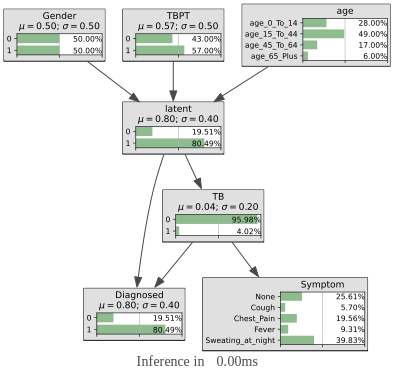

In [13]:
ie=gum.VariableElimination(bn)
ie.setEvidence({'TB':0})
ie.makeInference()
#ie.posterior("latent")[1]
gnb.showInference(bn, engine=ie)

In [14]:
for x in bn.names():
    for y in bn.names():
        if x != y and bn.isIndependent(x,y,[]):
            print(x, "is independent of", y)
print()
for x in bn.names():
    for y in bn.names():
        for z in bn.names():
            if x !=y and x != z and y != z and bn.isIndependent(x,y,[z]):
                print(x, "Ind", y, "Cond", z)
fileLocation = "C:\\Users\\terre\OneDrive - University of Cape Town\\Online Lecture\\CSC4025Z\\Assignment\\Assignment 1\\output.bif"
gum.saveBN(bn,fileLocation)

TBPT is independent of age
TBPT is independent of Gender
age is independent of TBPT
age is independent of Gender
Gender is independent of TBPT
Gender is independent of age

Diagnosed Ind Symptom Cond TB
Diagnosed Ind TBPT Cond latent
Diagnosed Ind age Cond latent
Diagnosed Ind Gender Cond latent
Symptom Ind Diagnosed Cond TB
Symptom Ind TBPT Cond TB
Symptom Ind TBPT Cond latent
Symptom Ind latent Cond TB
Symptom Ind age Cond TB
Symptom Ind age Cond latent
Symptom Ind Gender Cond TB
Symptom Ind Gender Cond latent
TBPT Ind Diagnosed Cond latent
TBPT Ind Symptom Cond TB
TBPT Ind Symptom Cond latent
TBPT Ind TB Cond latent
TBPT Ind age Cond Gender
TBPT Ind Gender Cond age
TB Ind TBPT Cond latent
TB Ind age Cond latent
TB Ind Gender Cond latent
latent Ind Symptom Cond TB
age Ind Diagnosed Cond latent
age Ind Symptom Cond TB
age Ind Symptom Cond latent
age Ind TBPT Cond Gender
age Ind TB Cond latent
age Ind Gender Cond TBPT
Gender Ind Diagnosed Cond latent
Gender Ind Symptom Cond TB
Gender I

In [15]:
dot = gv.Digraph("Tuberlusis", comment='Tuberlusis')
dot
dot.node("G", "Gender")
dot.node("A", "Age")
dot.node("P", "Tuberlusis Preventive Treatment")
dot.node("T", "TB Disease")
dot.node("L", "Latent TB Infection")
dot.node("S", "Symptoms")
dot.node("E", "Testing", shape="box")
dot.node("M", "Treatments", shape = "box")
dot.node("R", "Diagnosed")
dot.node("U", "Utility", shape = "hexagon")

dot.edges(['GL', 'AL', 'PL', 'LT', 'LR', 'TS', 'TR', 'TE', 'ER', 'RM'])
dot.edge("T", "U", style="dotted")
dot.edge("M", "U", style="dotted")


dot.render(directory='doctest-output').replace('\\', '/')
'doctest-output/round-table.gv.pdf'

dot.render(directory='doctest-output', view=True)  
'doctest-output/round-table.gv.pdf'



'doctest-output/round-table.gv.pdf'

In [16]:
dn = gum.InfluenceDiagram()
lstVariables = ["Gender", "latent", "TB", "TBPT", "Diagnosed"]
gender, latent, TB, TBPT, result= [dn.add(name,2) for name in lstVariables] #faster way to add variables
age = dn.add(gum.LabelizedVariable("age", "age", ["age_0_To_14", "age_15_To_44", "age_45_To_64", "age_65_Plus"]))
symptoms = dn.add(gum.LabelizedVariable("Symptom", "Patient's symptom", ["None", "Cough", "Chest_Pain", "Fever", "Sweating_at_night"]))
treatment =  dn.addDecisionNode(gum.LabelizedVariable("treatment", "taketreatment", 2))
utility = dn.addUtilityNode(gum.LabelizedVariable("utility", "utility", 1))
testing =  dn.addDecisionNode(gum.LabelizedVariable("testing", "testing", 2))

for link in [(age, latent), (latent, result), (gender,latent), (TBPT,latent), (latent,TB), (TB,symptoms), (TB,result), (latent,testing), (TB,testing), (testing,result), (result,treatment), (TB,utility), (treatment,utility)]:
    dn.addArc(*link)
dn


(pyAgrum.InfluenceDiagram<double>@000001DA38DB4DD0) Influence Diagram{
  chance: 7,
  utility: 1,
  decision: 2,
  arcs: 13,
  domainSize: 2560
}

In [17]:
# Define CPT for Gender
dn.cpt(gender)[:] = [0.5, 0.5] # 0=female, 1=male

# Define CPT for TBPT
dn.cpt(TBPT)[:] = [0.43, 0.57] #0=not vaccinated, 1=vaccincated

# Define prior probabilities for Age age_probs = [0.09, 0.43, 0.23, 0.25] 
dn.cpt(age)[:] = [0.28, 0.49, 0.17, 0.06]

# Define CPT for latent given Age, Gender, and TBPT
dn.cpt("latent")[{'age': 0, 'Gender': 0, 'TBPT': 0}] = [0.20, 0.80]
dn.cpt("latent")[{'age': 0, 'Gender': 0, 'TBPT': 1}] = [0.55, 0.45]
dn.cpt("latent")[{'age': 0, 'Gender': 1, 'TBPT': 0}] = [0.25, 0.75]
dn.cpt("latent")[{'age': 0, 'Gender': 1, 'TBPT': 1}] = [0.55, 0.45]
dn.cpt("latent")[{'age': 1, 'Gender': 0, 'TBPT': 0}] = [0.05, 0.95]
dn.cpt("latent")[{'age': 1, 'Gender': 0, 'TBPT': 1}] = [0.10, 0.90]
dn.cpt("latent")[{'age': 1, 'Gender': 1, 'TBPT': 0}] = [0.02, 0.98]
dn.cpt("latent")[{'age': 1, 'Gender': 1, 'TBPT': 1}] = [0.07, 0.93]
dn.cpt("latent")[{'age': 2, 'Gender': 0, 'TBPT': 0}] = [0.15, 0.85]
dn.cpt("latent")[{'age': 2, 'Gender': 0, 'TBPT': 1}] = [0.30, 0.70]
dn.cpt("latent")[{'age': 2, 'Gender': 1, 'TBPT': 0}] = [0.10, 0.90]
dn.cpt("latent")[{'age': 2, 'Gender': 1, 'TBPT': 1}] = [0.30, 0.70]
dn.cpt("latent")[{'age': 3, 'Gender': 0, 'TBPT': 0}] = [0.12, 0.88]
dn.cpt("latent")[{'age': 3, 'Gender': 0, 'TBPT': 1}] = [0.27, 0.73]
dn.cpt("latent")[{'age': 3, 'Gender': 1, 'TBPT': 0}] = [0.10, 0.90]
dn.cpt("latent")[{'age': 3, 'Gender': 1, 'TBPT': 1}] = [0.20, 0.80]

# Define CPT for TB given Latent
dn.cpt("TB")[{"latent": 0}] = [1,0] #0 = not active, 1 = active
dn.cpt("TB")[{"latent": 1}] = [0.90,0.10]

# Define CPT for Diagnosed given Latent, TB and Testing
dn.cpt('Diagnosed')[{'latent': 0, 'TB': 0, "testing":0}] = [1,0] #0 = not diagnosed 1 = diagnosed
dn.cpt('Diagnosed')[{'latent': 0, 'TB': 0, "testing":1}] = [0.99,0.01]
dn.cpt('Diagnosed')[{'latent': 0, 'TB': 1, "testing":0}] = [1,0]
dn.cpt('Diagnosed')[{'latent': 0, 'TB': 1, "testing":1}] = [0.01,0.99]
dn.cpt('Diagnosed')[{'latent': 1, 'TB': 0, "testing":0}] = [1,0]
dn.cpt('Diagnosed')[{'latent': 1, 'TB': 0, "testing":1}] = [0.01,0.99]
dn.cpt('Diagnosed')[{'latent': 1, 'TB': 1, "testing":0}] = [1,0]
dn.cpt('Diagnosed')[{'latent': 1, 'TB': 1, "testing":1}] = [0.01,0.99] 

# Define CPT for the most prominant symptom given TB
dn.cpt("Symptom")[{'TB': 0}] = [0.28, 0.03, 0.20, 0.08, 0.41]
dn.cpt("Symptom")[{'TB': 1}] = [0.00, 0.35, 0.15, 0.23, 0.27] #The prominant symptom

dn.utility("utility")[{'treatment':0,'TB':0}] = 50
dn.utility("utility")[{'treatment':0,'TB':1}] = -70
dn.utility("utility")[{'treatment':1,'TB':0}] = -10
dn.utility("utility")[{'treatment':1,'TB':1}] = 30

dn.utility("utility")


(pyAgrum.Potential<double>@000001DA3C583D80) 
             ||  utility|
TB    |treatm||0        |
------|------||---------|
0     |0     || 50.0000 |
1     |0     || -70.0000|
0     |1     || -10.0000|
1     |1     || 30.0000 |

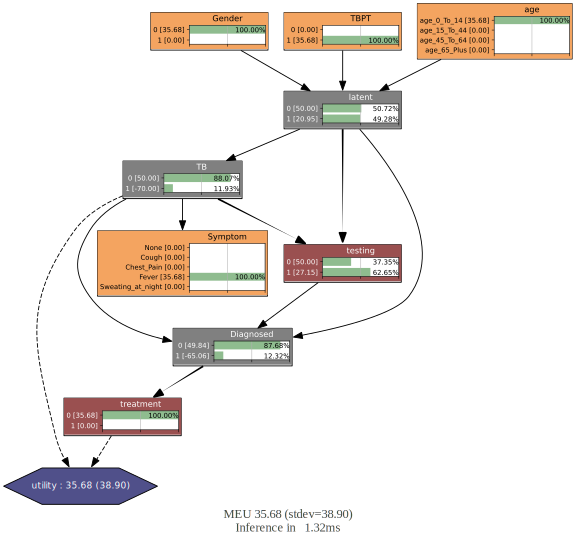

In [18]:
ie=gum.ShaferShenoyLIMIDInference(dn)
#ie.setEvidence({'age':1})
ie.makeInference()
#ie.optimalDecision("testing")
#ie.posteriorUtility("testing")
#gnb.showInference(dn,evs={'age':1}, engine=ie)
gnb.showInference(dn, evs={'age':0, 'Gender':0, 'TBPT':1, 'Symptom': 3,}, engine=ie)